# Exploratory Data Analysis

#### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('D:\Machine Learning\\notebook\Admission_Predict.csv')
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Understanding different columns
1. GRE Score (out of 340)
2. TOEFL Score (out of 120)
3. University Rating (out of 5)
4. SOP, LOR (strength of the Statement of Purpose/Letter of Recommendation out of 5)
5. CGPA (Cumulative Grade point average of the applicant)
6. Research experience (Yes or No : 1 or 0)
7. Chance of Admit (our target variable)

In [4]:
# checking the number of records
df.shape

(400, 9)

There are 400 rows and 9 columns

#### Performing basic EDA

In [5]:
# check for missing values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.duplicated().sum()

0

So there are no null/missing values. As well as no duplicate entries are reported

In [8]:
df.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


#### Visualizing Data to understand relationship between different variables and our target

AttributeError: 'FacetGrid' object has no attribute 'set_title'

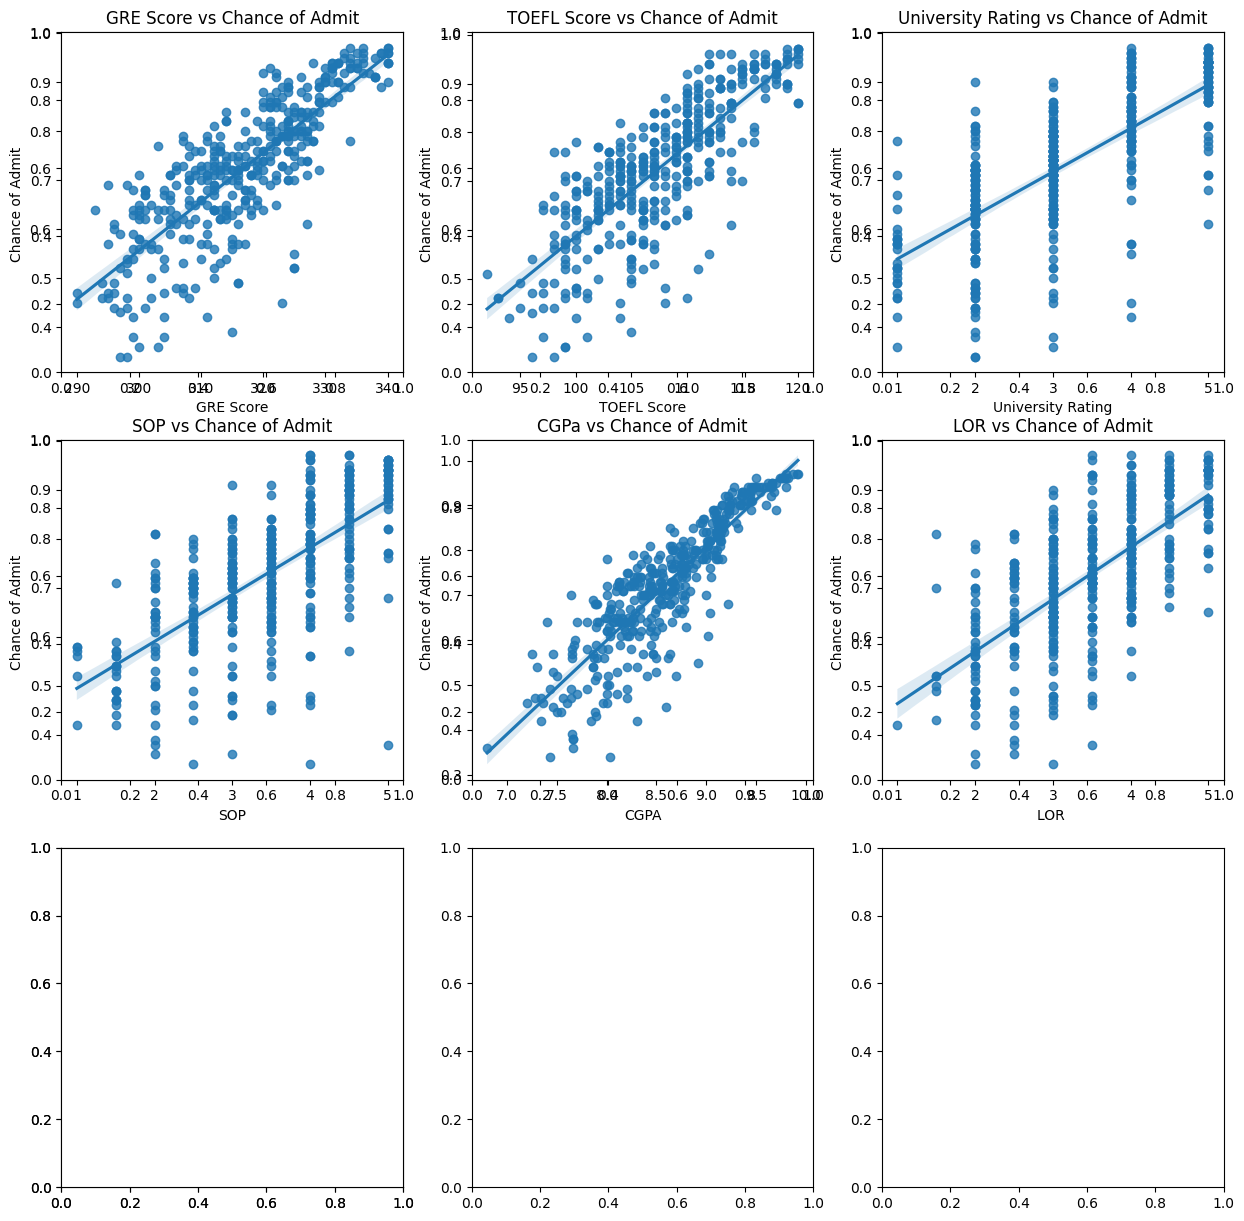

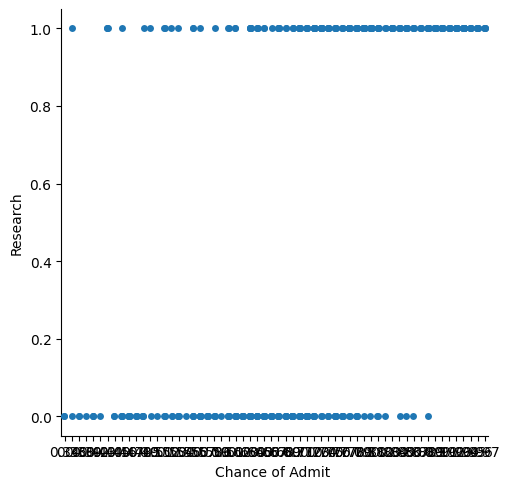

In [9]:
fig, ax = plt.subplots(3,3, figsize=(15,15))
ax = fig.add_subplot(3,3,1)
ax = sns.regplot(data=df, x='GRE Score', y='Chance of Admit ')
ax.set_title('GRE Score vs Chance of Admit')

ax = fig.add_subplot(3,3,2)
ax = sns.regplot(data=df, x='TOEFL Score', y='Chance of Admit ')
ax.set_title('TOEFL Score vs Chance of Admit')

ax = fig.add_subplot(3,3,3)
ax = sns.regplot(data=df, x='University Rating', y='Chance of Admit ')
ax.set_title('University Rating vs Chance of Admit')

ax = fig.add_subplot(3,3,4)
ax = sns.regplot(data=df, x='SOP', y='Chance of Admit ')
ax.set_title('SOP vs Chance of Admit')

ax = fig.add_subplot(3,3,5)
ax = sns.regplot(data=df, x='CGPA', y='Chance of Admit ')
ax.set_title('CGPa vs Chance of Admit')

ax = fig.add_subplot(3,3,6)
ax = sns.regplot(data=df, x='LOR ', y='Chance of Admit ')
ax.set_title('LOR vs Chance of Admit')

ax = fig.add_subplot(3,3,7)
ax = sns.catplot(data=df, x='Chance of Admit ', y='Research')
ax.set_title('Research vs Chance of Admit')

plt.show()




We can infer that while all the columns have a positive correlation with the Chance of Admit, CGPA,GRE Score and TOEFL Score are better indicators than the rest. Since in the rest of the factors we are observing high variance

In [20]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


The correlation table further strengthens our observations

#### Insights so far :-
1. GRE Score, TOEFL Score and the CGPA matter the most
2. It is advisable to have some sort of Research experience
3. While University Rating, Strength of SOP and Strength of LOR all have positives correlations, they donot matter as much as the GRE Score, TOEFL Score and the CGPA

<Axes: xlabel='Research', ylabel='Chance of Admit '>

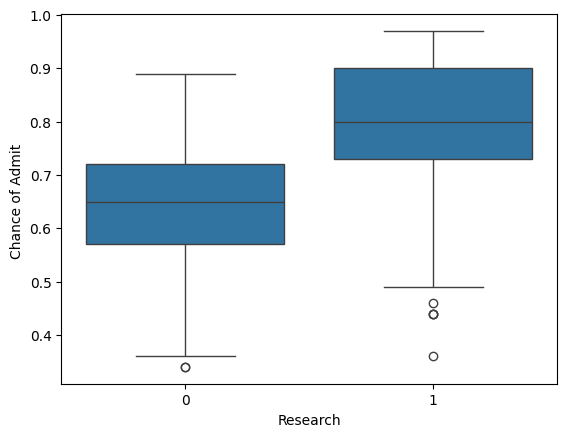

In [21]:
sns.boxplot(y=df['Chance of Admit '], x=df['Research'])

So we can see that applicants with some Research Experience (1) have a higher Chance of Admit overall (leaving behind some outliers)

In [14]:
df_1 = df[(df['Research']==1)]
df_1 = df_1[df_1['Chance of Admit ']>0.5]

In [15]:
df_0 = df[df['Research']==0]
df_0 = df_0[df['Chance of Admit ']>0.35]

In [16]:
df_2 = pd.concat([df_1,df_0], axis=0)


<Axes: xlabel='Research', ylabel='Chance of Admit '>

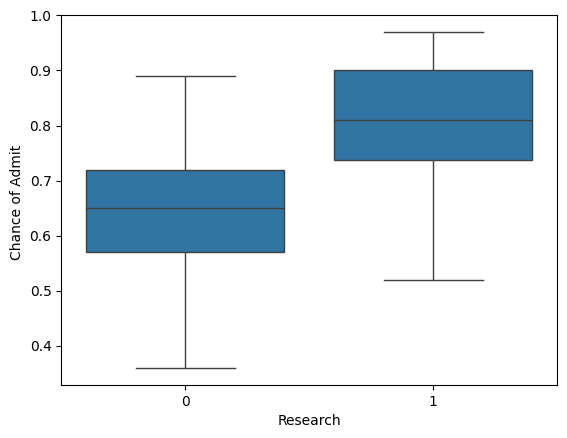

In [17]:
sns.boxplot(data=df_2, x=df_2['Research'], y=df_2['Chance of Admit '])

In [18]:
df_2.to_csv('data_cleaned.csv')